In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.drop('Id',axis=1,inplace=True)
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
features=df.iloc[:,:-1].values
species=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,species,test_size=.3)
x_train

array([[5.2, 3.5, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3. , 5. , 1.7],
       [7.1, 3. , 5.9, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 3.3, 5.7, 2.5],
       [7.7, 2.6, 6.9, 2.3],
       [7. , 3.2, 4.7, 1.4],
       [4.8, 3.4, 1.9, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [6. , 2.2, 4. , 1. ],
       [5. , 3.5, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [7.6, 3. , 6.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [4.4, 2.9, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.6, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5.6, 2.9, 3.6, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.7, 3. , 5.2, 2.3],
       [4.7, 3.2, 1.3, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [4.4, 3. , 1.3, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 2.8, 5.1, 1.5],
       [5.4, 3

In [6]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


In [7]:
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 15]])

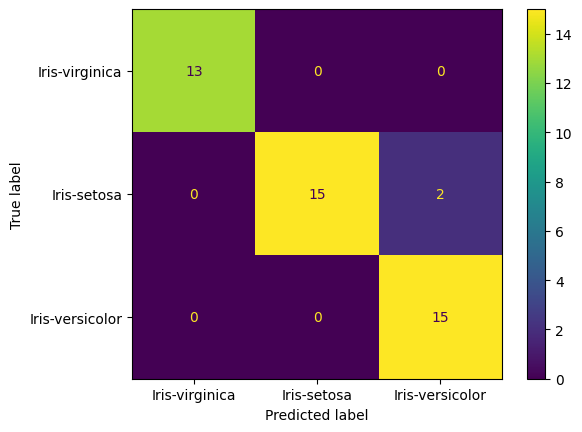

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['Iris-virginica', 'Iris-setosa','Iris-versicolor']
cmd=ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [11]:
#Display Accuracy Score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9555555555555556

In [12]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

